# Step 1: Load Dataset

In [17]:
import pandas as pd

# Load the dataset with the 'python' engine
# The 'python' engine is more robust to variations in CSV format
# Handle bad lines by skipping them
df = pd.read_csv('/content/IMDB Dataset.csv', engine='python', on_bad_lines='skip')

# Sample the dataset and reset index
df = df.sample(n=5000, random_state=42).reset_index(drop=True)

# Show the DataFrame
df

,review,sentiment
0,<br /><br />12 Grand is the cost of a new car....,negative
1,Linda Lovelace was the victim of a sadistic wo...,negative
2,"An unoriginal, overly predictable and only mil...",negative
3,If it is true that sadomasochism is a two-side...,positive
4,This is one of those movies that's difficult t...,positive
...,...,...
4995,A very funny east-meets-west film influenced b...,positive
4996,"You Are Alone is a beautiful, almost delicate ...",positive
4997,"A vastly underrated black comedy, the finest i...",positive
4998,The movie was disappointing. The book was powe...,negative


In [18]:
df['sentiment'].value_counts()

,count
sentiment,
negative,2508
positive,2492


# Step 2: Preprocessing (Lowercasing, Removing Punctuation, Tokenization)


In [19]:
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Preprocess function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Remove punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])

    # Remove extra spaces
    text = ' '.join(text.split())

    return text

# Apply preprocessing
df['cleaned_text'] = df['review'].apply(preprocess_text)

df


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review,sentiment,cleaned_text
0,<br /><br />12 Grand is the cost of a new car....,negative,grand cost new car new car jake west needs esc...
1,Linda Lovelace was the victim of a sadistic wo...,negative,linda lovelace victim sadistic woman hater chu...
2,"An unoriginal, overly predictable and only mil...",negative,unoriginal overly predictable mildly entertain...
3,If it is true that sadomasochism is a two-side...,positive,true sadomasochism twosided coin contains whol...
4,This is one of those movies that's difficult t...,positive,one movies thats difficult review without givi...
...,...,...,...
4995,A very funny east-meets-west film influenced b...,positive,funny eastmeetswest film influenced closure gm...
4996,"You Are Alone is a beautiful, almost delicate ...",positive,alone beautiful almost delicate film smart dir...
4997,"A vastly underrated black comedy, the finest i...",positive,vastly underrated black comedy finest series g...
4998,The movie was disappointing. The book was powe...,negative,movie disappointing book powerful views learni...


# 2.1 Encoding


In [20]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the sentiment labels (positive -> 1, negative -> 0)
df['encoded_sentiment'] = label_encoder.fit_transform(df['sentiment'])

# Step 3: Tokenization and Padding

In [21]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenizer setup
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['cleaned_text'])

# Convert text to sequences (integer representation)
sequences = tokenizer.texts_to_sequences(df['cleaned_text'])


In [22]:
print(f"Tokenizer word index:\n{tokenizer.word_index}")  # Show the tokenizer word index

Tokenizer word index:
{'<OOV>': 1, 'movie': 2, 'film': 3, 'one': 4, 'like': 5, 'good': 6, 'would': 7, 'even': 8, 'time': 9, 'really': 10, 'see': 11, 'story': 12, 'get': 13, 'well': 14, 'much': 15, 'bad': 16, 'great': 17, 'people': 18, 'also': 19, 'first': 20, 'dont': 21, 'made': 22, 'films': 23, 'could': 24, 'movies': 25, 'way': 26, 'make': 27, 'characters': 28, 'think': 29, 'two': 30, 'watch': 31, 'character': 32, 'seen': 33, 'never': 34, 'little': 35, 'show': 36, 'many': 37, 'acting': 38, 'love': 39, 'know': 40, 'plot': 41, 'best': 42, 'life': 43, 'scene': 44, 'man': 45, 'say': 46, 'ever': 47, 'scenes': 48, 'still': 49, 'better': 50, 'something': 51, 'end': 52, 'go': 53, 'real': 54, 'actors': 55, 'actually': 56, 'watching': 57, 'doesnt': 58, 'thing': 59, 'didnt': 60, 'im': 61, 'back': 62, 'nothing': 63, 'though': 64, 'funny': 65, 'years': 66, 'going': 67, 'lot': 68, 'makes': 69, 'look': 70, 'another': 71, 'work': 72, 'find': 73, 'every': 74, 'new': 75, 'us': 76, 'cant': 77, 'things':

In [23]:
sequences[0:3]

[[1281,
  2208,
  75,
  364,
  75,
  364,
  4291,
  1019,
  600,
  854,
  1,
  1304,
  8474,
  1663,
  495,
  91,
  46,
  3,
  24,
  4683,
  16,
  6,
  2170,
  575,
  2353,
  1728,
  16,
  16,
  7079],
 [3539,
  1,
  1404,
  2774,
  135,
  1,
  2398,
  1,
  21,
  264,
  294,
  700,
  1444,
  2775,
  14,
  150,
  302,
  65,
  3539,
  1,
  5160,
  4292,
  1,
  158,
  23,
  40,
  18,
  6553,
  830,
  134,
  1852,
  2045,
  23,
  7080,
  877,
  3030,
  9434,
  1755,
  807,
  239,
  866,
  1966,
  1853,
  239,
  848,
  3958,
  2694,
  273,
  2776,
  470,
  8475,
  93,
  134,
  99,
  26,
  53,
  47,
  5777,
  2046,
  8475],
 [3660,
  2096,
  568,
  2556,
  302,
  316,
  258,
  5461,
  660,
  2171,
  1305,
  33,
  2777,
  141,
  409,
  3661,
  7081,
  7738,
  1585,
  940,
  51,
  1158,
  673,
  673,
  1,
  3,
  814,
  508,
  1,
  113,
  1,
  522,
  88,
  1586,
  2695,
  1664,
  729,
  56,
  16,
  1,
  1756,
  9435,
  231,
  35,
  1,
  2471,
  5161,
  317,
  27,
  78,
  310,
  23,
  831,
  490

In [24]:
max_len = max([len(seq) for seq in sequences])
max_len

913

In [25]:
# Pad the sequences
max_len = 582 # Max length of sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len, padding='post')

# Step 4: Train a Simple RNN Model


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SimpleRNN # Import SimpleRNN
from tensorflow.keras.optimizers import Adam


# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=64, input_length=max_len),
    SimpleRNN(128, activation='tanh', return_sequences=True),  # Increased units and return sequences
    Dropout(0.5),  # Dropout to prevent overfitting
    SimpleRNN(64, activation='tanh'),  # Adding another RNN layer
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Output layer with sigmoid for binary classification
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [27]:
# Train the model
history = model.fit(padded_sequences, df['encoded_sentiment'], epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 16s 147ms/step - accuracy: 0.5060 - loss: 0.8145 - val_accuracy: 0.5140 - val_loss: 0.6928
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 95ms/step - accuracy: 0.4944 - loss: 0.7979 - val_accuracy: 0.5140 - val_loss: 0.6938
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 89ms/step - accuracy: 0.4847 - loss: 0.7665 - val_accuracy: 0.5110 - val_loss: 0.6931
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.4844 - loss: 0.7829 - val_accuracy: 0.5150 - val_loss: 0.7195
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 90ms/step - accuracy: 0.4925 - loss: 0.7553 - val_accuracy: 0.4870 - val_loss: 0.6939
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 94ms/step - accuracy: 0.5028 - loss: 0.7325 - val_accuracy: 0.4790 - val_loss: 0.6944
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 94ms/step - accuracy: 0.4938 - loss: 0.7377 - val_accuracy: 0.4790 - val_loss: 0.6953
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.4910 - loss: 0.7276 - val_accuracy: 0.4860

# Step 5: Plot the Loss

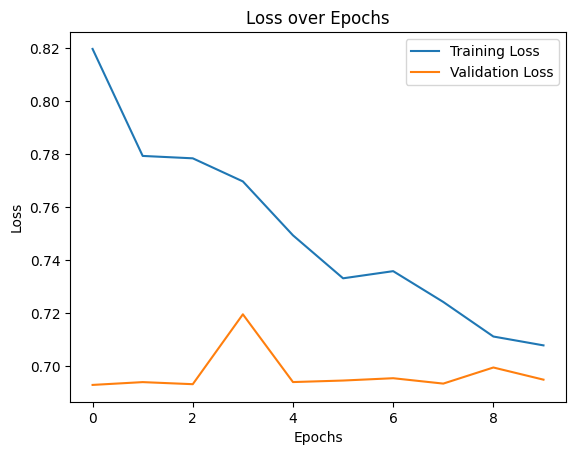

In [28]:
import matplotlib.pyplot as plt

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Step 6: Generate Classification Report and Confusion Matrix


In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict the sentiment
y_pred = (model.predict(padded_sequences) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(df['encoded_sentiment'], y_pred)
print("Confusion Matrix:\n", cm)

# Classification Report
print("Classification Report:\n", classification_report(df['encoded_sentiment'], y_pred))


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step
Confusion Matrix:
 [[  99 2409]
 [ 120 2372]]
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.04      0.07      2508
           1       0.50      0.95      0.65      2492

    accuracy                           0.49      5000
   macro avg       0.47      0.50      0.36      5000
weighted avg       0.47      0.49      0.36      5000



# Step 7: Save and Load the Model


In [30]:
# Save the model
model.save('sentiment_rnn_model.h5')

# Load the model
from tensorflow.keras.models import load_model
loaded_model = load_model('sentiment_rnn_model.h5')


# Step 8: Prediction System


In [31]:
def predict_sentiment(sentence):
    # Preprocess the input sentence
    sentence = preprocess_text(sentence)

    # Tokenize and pad the sentence
    sequence = tokenizer.texts_to_sequences([sentence])
    padded_sequence = pad_sequences(sequence, maxlen=max_len, padding='post')

    # Predict sentiment
    prediction = loaded_model.predict(padded_sequence)
    if prediction > 0.5:
        return "Positive"
    else:
        return "Negative"

# Test the prediction system
test_sentence = "I love this product!"
print(f"Sentiment: {predict_sentiment(test_sentence)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
Sentiment: Positive


In [32]:
# Test the prediction system
test_sentence = "I hate this movie!"
print(f"Sentiment: {predict_sentiment(test_sentence)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Sentiment: Positive
